In [ ]:
from google.colab import files
uploaded = files.upload()

In [12]:
pip install ucimlrepo


In [13]:
from ucimlrepo import fetch_ucirepo
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
import seaborn as sns
import matplotlib.pyplot as plt
import shap
from sklearn.impute import SimpleImputer

In [14]:
cervical_cancer_risk_factors = fetch_ucirepo(id=383)
df = cervical_cancer_risk_factors.data.features
df = df.dropna(thresh=len(df)*0.5, axis=1)
# Remplacer les valeurs manquantes restantes par des médianes pour les colonnes numériques
imputer = SimpleImputer(strategy="median")
df.iloc[:, :] = imputer.fit_transform(df)
print(df.shape)

(858, 34)


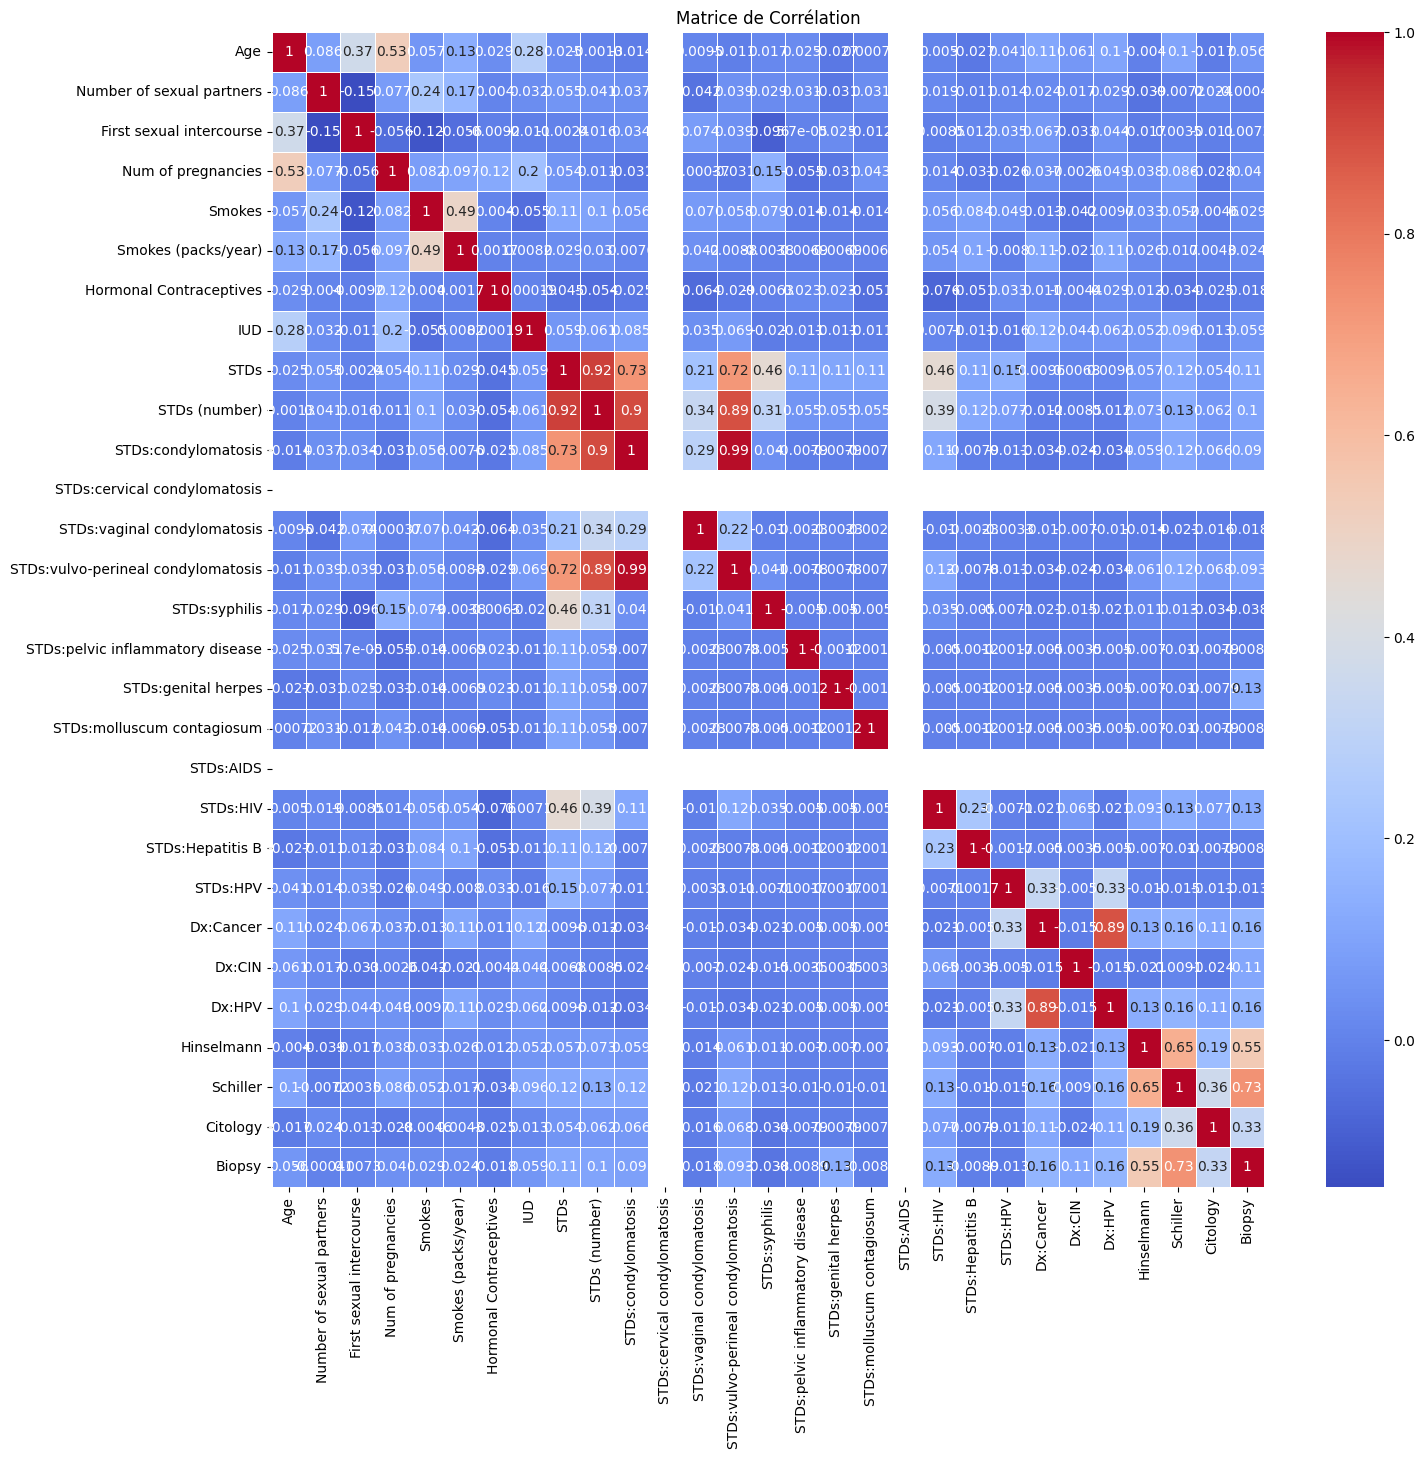

In [17]:
# Heatmap des corrélations
plt.figure(figsize=(16, 15))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Matrice de Corrélation")
plt.show()

In [16]:
cols_to_drop = ["Smokes (years)", "Hormonal Contraceptives (years)", "IUD (years)", "STDs: Number of diagnosis", "Dx"]
df= df.drop(columns=[col for col in cols_to_drop if col in df.columns])
print(df.shape)

(858, 29)


In [29]:
df.head()  #visualiser les colonnes

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (packs/year),Hormonal Contraceptives,IUD,STDs,STDs (number),...,STDs:HIV,STDs:Hepatitis B,STDs:HPV,Dx:Cancer,Dx:CIN,Dx:HPV,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
2,34,1.0,17.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1,0,1,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0


In [30]:
df.describe() #pour avoir les stat

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (packs/year),Hormonal Contraceptives,IUD,STDs,STDs (number),...,STDs:HIV,STDs:Hepatitis B,STDs:HPV,Dx:Cancer,Dx:CIN,Dx:HPV,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,...,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,2.511655,16.995338,2.257576,0.143357,0.446278,0.686480,0.096737,0.092075,0.155012,...,0.020979,0.001166,0.002331,0.020979,0.010490,0.020979,0.040793,0.086247,0.051282,0.064103
std,8.497948,1.644759,2.791883,1.400981,0.350641,2.210351,0.464194,0.295771,0.289300,0.529617,...,0.143398,0.034139,0.048252,0.143398,0.101939,0.143398,0.197925,0.280892,0.220701,0.245078
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,2.000000,17.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,1.000000,37.000000,1.000000,1.000000,1.000000,4.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [32]:
df.isnull()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (packs/year),Hormonal Contraceptives,IUD,STDs,STDs (number),...,STDs:HIV,STDs:Hepatitis B,STDs:HPV,Dx:Cancer,Dx:CIN,Dx:HPV,Hinselmann,Schiller,Citology,Biopsy
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
854,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
855,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
856,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [18]:
# Séparer les caractéristiques et la cible
X = df.drop(columns=['Biopsy'])
y = df['Biopsy']

# Normalisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Réduire les données en 2D avec PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [23]:
# Séparer en train et test
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Entraîner un modèle SVM
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

# Prédiction et évaluation
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

Précision du modèle : 0.94


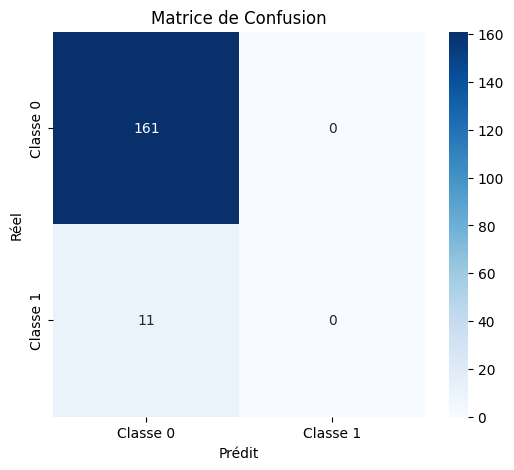

In [24]:
# Matrice de confusion avec heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Classe 0", "Classe 1"], yticklabels=["Classe 0", "Classe 1"])
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.title("Matrice de Confusion")
plt.show()

<ipython-input-22-04f1f7d7291b>:4: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='bwr', edgecolors='k', marker='x', s=100, label='Test')


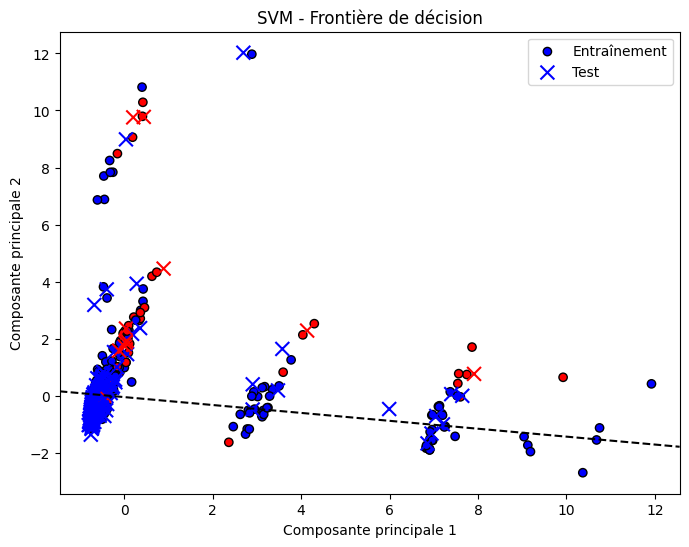

In [22]:
# Tracer les points d'entraînement et de test
plt.figure(figsize=(8,6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='bwr', edgecolors='k', label='Entraînement')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='bwr', edgecolors='k', marker='x', s=100, label='Test')

# Tracer la frontière de décision
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                     np.linspace(ylim[0], ylim[1], 50))

Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
# Tracer la ligne de séparation et les marges
plt.contour(xx, yy, Z, colors='black', levels=[-1, 0, 1], linestyles=['dashed', 'solid', 'dashed'])
plt.legend()
plt.title("SVM - Frontière de décision")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.show()

In [27]:
# Affichage des performances
from sklearn.metrics import classification_report, roc_auc_score # Import roc_auc_score here
print("📊 Rapport de classification :\n", classification_report(y_test, y_pred))
print(f"Précision du modèle : {accuracy:.2f}")
print(f"🔹 ROC-AUC Score : {roc_auc_score(y_test, y_pred):.2f}")

📊 Rapport de classification :
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       161
           1       0.00      0.00      0.00        11

    accuracy                           0.94       172
   macro avg       0.47      0.50      0.48       172
weighted avg       0.88      0.94      0.91       172

Précision du modèle : 0.94
🔹 ROC-AUC Score : 0.50


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [28]:
# Afficher la répartition des classes
print("\n📊 Répartition des classes après prétraitement :")
print(df['Biopsy'].value_counts(normalize=True))


📊 Répartition des classes après prétraitement :
Biopsy
0    0.935897
1    0.064103
Name: proportion, dtype: float64
